Problem Statement: Can we Predict the likelihood of offence being prosecuted? Given the information related to crime such as type, time of year, location etc ? 

In [2]:
import pandas as pd 
import numpy as np 
from numpy import linspace
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#from imblearn.combine import SMOTETomek
from collections import Counter

## Clean Data Ingestion

In [3]:
df = pd.read_csv("D:/ADSP/Hertfordshire-Constabulary/data/final-one-hot-mean-encoded.csv")
df

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type
0,0.331247,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.250000,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.123494,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.161017,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.192090,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120944,0.331247,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
120945,0.187500,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
120946,0.233202,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
120947,0.086957,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df_train = pd.read_csv("D:/ADSP/Hertfordshire-Constabulary/data/train_final-one-hot-mean-encoded.csv")
df_train

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type
0,0.132948,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.176471,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.137255,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.370253,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.242424,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96754,0.150485,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96755,0.242820,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
96756,0.309701,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
96757,0.256757,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df_test = pd.read_csv("D:/ADSP/Hertfordshire-Constabulary/data/test_final-one-hot-mean-encoded.csv")
df_test

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type
0,0.235294,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.231579,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.111111,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.155779,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.336134,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24185,0.200000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24186,0.078947,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24187,0.262069,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
24188,0.113636,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
def x_var(df):
    df = df.iloc[:,:-1]

    return df

In [7]:
def y_var(df):
    df = df["outcome_type"]

    return df

In [8]:
x_train = x_var(df_train)
x_test = x_var(df_test)

In [9]:
y_train = y_var(df_train)
y_test = y_var(df_test)

In [5]:
# x_train = df_train.iloc[: , :-1]
# x_train

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,crime_month_11,crime_type_Burglary,crime_type_Criminal damage and arson,crime_type_Drugs,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences
0,0.132948,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.176471,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.137255,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.370253,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.242424,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96754,0.150485,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
96755,0.242820,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
96756,0.309701,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
96757,0.256757,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# y_train = df_train["outcome_type"]
# y_train

0        0
1        1
2        1
3        0
4        0
        ..
96754    0
96755    0
96756    0
96757    0
96758    0
Name: outcome_type, Length: 96759, dtype: int64

In [7]:
#x_train, x_test, y_train, y_test = train_test_split(x_input, y, test_size=0.20, random_state=4, stratify=y) 
# using stratify to ensure no class disparity

In [10]:
y_train.value_counts()

0    78101
1    18658
Name: outcome_type, dtype: int64

In [11]:
y_test.value_counts()

0    19526
1     4664
Name: outcome_type, dtype: int64

## Modelling

### Using Grid Search CV to identify best model and parameters 

In [23]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100],
            'min_samples_leaf': [10,50,100]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': list(range(1,10)),
            'p': [1,2],
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth':[3,5,10]
        }
    },
    "XGBClassifier": {
        "model": XGBClassifier(use_label_encoder=False, booster='gbtree',
        eval_metric = "logloss"),
        "params": {'n_estimators': range(6, 10),
        'max_depth': range(3, 8),
        'learning_rate': [.01, .2, .3, .4, .5],
        'colsample_bytree': [.7, .8, .9, 1]}
    }     
}

In [24]:

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv = 5, 
    scoring = "f1", return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_metrics = pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [25]:
df_metrics

,model,best_score,best_params
0,random_forest,0.307135,"{'min_samples_leaf': 10, 'n_estimators': 1}"
1,KNN,0.354116,"{'n_neighbors': 1, 'p': 1}"
2,decision_tree,0.254324,"{'criterion': 'entropy', 'max_depth': 5}"
3,XGBClassifier,0.256286,"{'colsample_bytree': 1, 'learning_rate': 0.01,..."


### KNN 

In [26]:
clf_knn = KNeighborsClassifier(n_neighbors=1, p=1)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [27]:
y_pred = clf_knn.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16495  3031]
 [ 3230  1434]]


In [28]:
print(f"The F1 Score is: {f1_score(y_test, y_pred)}")
print(f"The AUC Score is: {roc_auc_score(y_test, y_pred)}")

The F1 Score is: 0.31416365428853105
The AUC Score is: 0.5761162404914133


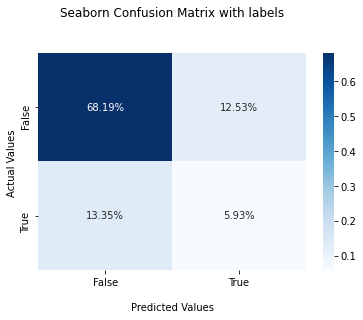

In [29]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

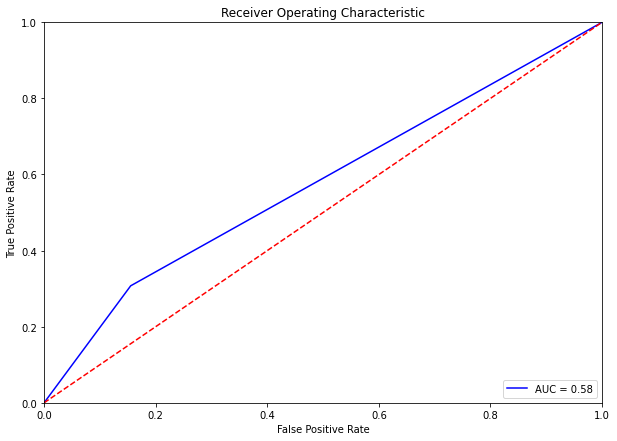

In [30]:
fig = plt.figure(figsize=(10, 7))


fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest

In [35]:
clf_rf = RandomForestClassifier(min_samples_leaf=10, n_estimators=1)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=1)

In [36]:
y_pred = clf_rf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[18533   993]
 [ 3762   902]]


In [37]:
print(f"The F1 Score is: {f1_score(y_test, y_pred)}")
print(f"The AUC Score is: {roc_auc_score(y_test, y_pred)}")

The F1 Score is: 0.27504192712303704
The AUC Score is: 0.5712704782592731


In [38]:
# Using Grid Search CV to find optimum weights 

class_weight = np.linspace(0.05, 1.5, 20) # creating evenly spaced numbers 
grid_para = {'class_weight' : [{0: x, 1: 1.0-x} for x in class_weight]}

gridsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=1, min_samples_leaf=10),
                          param_grid = grid_para,
                          scoring = 'f1',
                          cv = 5)
gridsearch.fit(x_train, y_train)
print(gridsearch.best_params_)

{'class_weight': {0: 0.20263157894736844, 1: 0.7973684210526315}}


In [39]:
clf_rf = RandomForestClassifier(min_samples_leaf=10, n_estimators=1, 
class_weight={0: 0.20263157894736844, 1: 0.7973684210526315})

clf_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.20263157894736844,
                                     1: 0.7973684210526315},
                       min_samples_leaf=10, n_estimators=1)

In [40]:
y_pred = clf_rf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[13080  6446]
 [ 1946  2718]]


In [41]:
print(f"The F1 Score is: {f1_score(y_test, y_pred)}")
print(f"The AUC Score is: {roc_auc_score(y_test, y_pred)}")

The F1 Score is: 0.39311541799247907
The AUC Score is: 0.6263188203651234


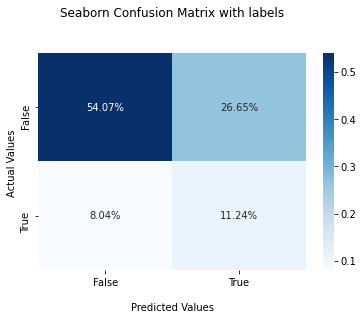

In [42]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

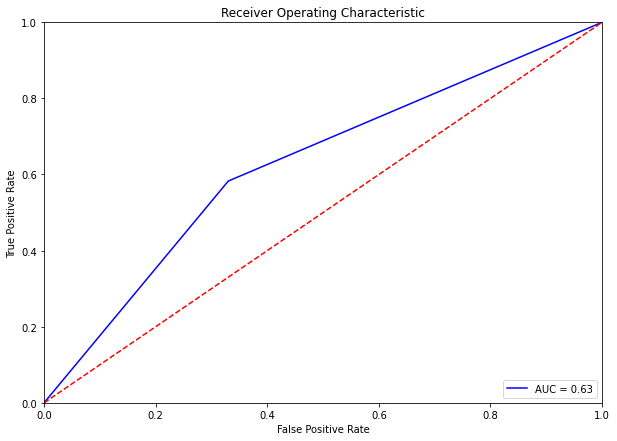

In [43]:
fig = plt.figure(figsize=(10, 7))


fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Voting Ensemble Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)
# create the sub models
estimator = []
model1 = RandomForestClassifier(min_samples_leaf=10, n_estimators=1, class_weight={0: 0.20263157894736844, 1: 0.7973684210526315})
estimator.append(('RandomForest', model1))

model2 = KNeighborsClassifier(n_neighbors=1, p=1)
estimator.append(('KNN', model2))

model3 = XGBClassifier(use_label_encoder=False, booster='gbtree',
        eval_metric = "logloss")
estimator.append(('XGBoost', model3))

# create the ensemble model
ensemble= VotingClassifier(estimators = estimator) 

results = cross_val_score(ensemble, x_train, y_train, cv=kfold, scoring="f1")
print(results.mean())

0.3803434113550581


In [20]:
ensemble_hard = VotingClassifier(estimators = estimator, voting = "hard") 
ensemble_hard.fit(x_train, y_train)
y_pred = ensemble_hard.predict(x_test)

In [21]:
print(f"The F1 Score for Hard voting is: {f1_score(y_test, y_pred)}")
print(f"The AUC Score for soft voting is: {roc_auc_score(y_test, y_pred)}")

The F1 Score for Hard voting is: 0.36055396370582615
The AUC Score for soft voting is: 0.605491859470831


In [22]:
ensemble_soft = VotingClassifier(estimators = estimator, voting = "soft") 
ensemble_soft.fit(x_train, y_train)
y_pred = ensemble_soft.predict(x_test)

In [23]:
print(f"The F1 Score for Hard voting is: {f1_score(y_test, y_pred)}")
print(f"The AUC Score for soft voting is: {roc_auc_score(y_test, y_pred)}")

The F1 Score for Hard voting is: 0.3390583012034116
The AUC Score for soft voting is: 0.5929699508716794


### Artifical Neural Networks 

In [51]:
# x_train, x_test, y_train, y_test = train_test_split(x_input, y, test_size=0.20, random_state=4, stratify=y) 
# # using stratify to ensure no class disparity

In [45]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=4, stratify=y_train) 
# using stratify to ensure no class disparity

In [46]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', 
                                                  classes = np.unique(y_train), 
                                                  y = y_train)
class_weights

array([0.61944431, 2.59302559])

In [47]:
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 0.6194443110705654, 1: 2.593025592925097}

In [48]:
from keras import backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [49]:
metric = ['accuracy', 
          f1_metric, tf.keras.metrics.Precision(name='precision'), 
          tf.keras.metrics.Recall(name='recall'), 
          tf.keras.metrics.AUC(name='auc')]

In [51]:
def my_model():

  model = keras.Sequential([
        keras.layers.Dense(48, input_dim=24, activation='selu', 
                           kernel_initializer='he_uniform'), # initialising weights
        keras.layers.Dense(96, activation="selu"),
        keras.layers.Dense(48, activation='selu'),
        keras.layers.Dense(32, activation='selu'),
        keras.layers.Dense(32, activation='selu'),
        keras.layers.Dense(32, activation='selu'),
        keras.layers.Dense(32, activation='selu'),
        keras.layers.Dense(24, activation='selu'),
        keras.layers.Dense(24, activation='selu'),
        keras.layers.Dense(12, activation='selu'),
        keras.layers.Dense(6, activation='selu'),
        keras.layers.Dense(4, activation='selu'),
        keras.layers.Dense(2, activation='selu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

  # The optimiser is Adam with a learning rate of 0.001:
  optim = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, 
                                   epsilon = 10e-8, decay = 0.1, amsgrad = True)

  # The model optimises cross entropy as its loss function and will monitor classification accuracy:
  model.compile(optimizer=optim, 
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                metrics=metric)

  # Printing model summary:
  print(model.summary())

  return model
print('Done!')

Done!


In [52]:
model = my_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                1200      
_________________________________________________________________
dense_1 (Dense)              (None, 96)                4704      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                4656      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1

In [53]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import datetime, os

es = EarlyStopping(monitor = "val_f1_metric", mode = "max", min_delta= 0.0001, patience = 5, verbose=1)
mc = ModelCheckpoint(filepath="D:/ADSP/Hertfordshire-Constabulary/model/checkpoint", 
                     monitor="val_f1_metric", verbose=1, save_best_only= True, mode="max")

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [54]:
history = model.fit(x_train, y_train, epochs= 200, validation_data = (x_val, y_val), 
                    callbacks = [es,mc, tensorboard_callback], class_weight = class_weight_dict)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/200
2419/2419 [==============================] - 9s 3ms/step - loss: 0.6364 - accuracy: 0.7212 - f1_metric: 0.4015 - precision: 0.3499 - recall: 0.5194 - auc: 0.6799 - val_loss: 0.6368 - val_accuracy: 0.7196 - val_f1_metric: 0.4093 - val_precision: 0.3514 - val_recall: 0.5370 - val_auc: 0.6890

Epoch 00001: val_f1_metric improved from -inf to 0.40929, saving model to D:/ADSP/Hertfordshire-Constabulary/model\checkpoint
INFO:tensorflow:Assets written to: D:/ADSP/Hertfordshire-Constabulary/model\checkpoint\assets
Epoch 2/200
2419/2419 [==============================] - 5s 2ms/step - loss: 0.6314 - accuracy: 0.7217 - f1_metric: 0.4080 - precision: 0.3529 - recall: 0.5316 - auc: 0.6891 - val_loss: 0.6335 - val_accuracy: 0.7227 - val_f1_metric: 0.4117 - val_precision: 0.3551 - val_recall: 0.5367 - val_auc: 0.6908

Epoch 00002: val_f1_metric improve

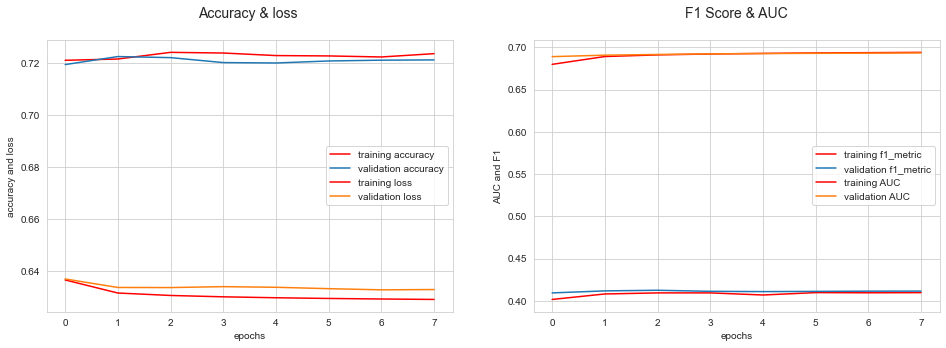

In [56]:
fig = plt.figure(figsize=(16, 5))
#  subplot #1
plt.subplot(121)
import seaborn as sns 
sns.set_style("whitegrid")
plt.plot(history.history["accuracy"], 'r', label = "training accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.plot(history.history["loss"], 'r', label = "training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("accuracy and loss")
plt.title("Accuracy & loss \n", fontsize = 14)
plt.legend()

#  subplot #2
plt.subplot(122)
import seaborn as sns 
sns.set_style("whitegrid")
plt.plot(history.history["f1_metric"], 'r', label = "training f1_metric")
plt.plot(history.history["val_f1_metric"], label = "validation f1_metric")
plt.plot(history.history["auc"], 'r', label = "training AUC")
plt.plot(history.history["val_auc"], label = "validation AUC")
plt.xlabel("epochs")
plt.ylabel("AUC and F1")
plt.title("F1 Score & AUC\n", fontsize = 14)
plt.legend()

plt.show()

In [57]:
acc = model.evaluate(x_test, y_test, verbose = 1, )
print(f"The accuracy for Test Data is: {acc[1] * 100} %")

756/756 [==============================] - 1s 1ms/step - loss: 0.6294 - accuracy: 0.7246 - f1_metric: 0.4120 - precision: 0.3571 - recall: 0.5347 - auc: 0.7017
The accuracy for Test Data is: 72.4638283252716 %


In [70]:
model.save("D:/ADSP/Hertfordshire-Constabulary/model/ann-best-model")

INFO:tensorflow:Assets written to: D:/ADSP/Hertfordshire-Constabulary/model/ann-best-model\assets


In [64]:
y_pred_prob = model.predict(x_test)
y_pred_prob

array([[0.5075538 ],
       [0.52081215],
       [0.65874994],
       ...,
       [0.48639378],
       [0.36177823],
       [0.33533746]], dtype=float32)

In [59]:
y_pred = np.round(y_pred_prob)
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [60]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.77      0.82     19526
           1       0.36      0.53      0.43      4664

    accuracy                           0.72     24190
   macro avg       0.62      0.65      0.62     24190
weighted avg       0.77      0.72      0.74     24190



In [61]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[15035  4491]
 [ 2170  2494]]


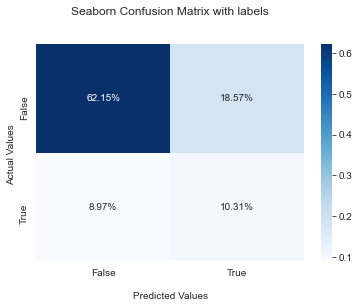

In [62]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

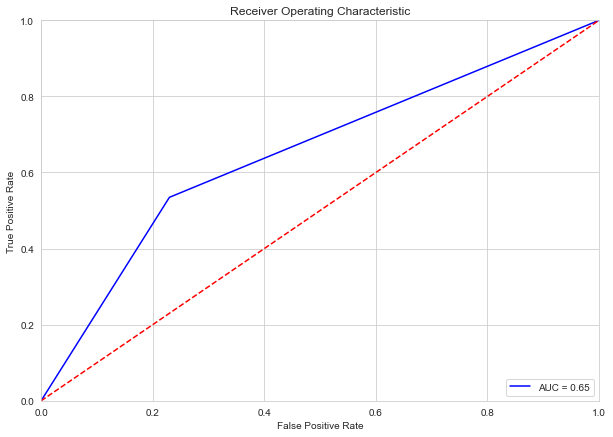

In [63]:
fig = plt.figure(figsize=(10, 7))


fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
df_pred = pd.DataFrame(y_pred, columns=["class_predicted"])
df_prob = pd.DataFrame(y_pred_prob, columns=["class_prob"])

df_test = pd.concat([df_test, df_pred, df_prob], axis=1)
df_test.head()

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,crime_type_Drugs,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type,class_predicted,class_prob
0,0.235294,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1.0,0.507554
1,0.231579,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.520812
2,0.111111,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.0,0.658750
3,0.155779,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.0,0.330843
4,0.336134,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1.0,0.855377


In [69]:
df_test

,LSOA_code,crime_year_2019,crime_year_2020,crime_year_2021,crime_month_1,crime_month_2,crime_month_3,crime_month_4,crime_month_5,crime_month_6,...,crime_type_Drugs,crime_type_Possession of weapons,crime_type_Public order,crime_type_Robbery,crime_type_Theft,crime_type_Vehicle crime,crime_type_Violence and sexual offences,outcome_type,class_predicted,class_prob
0,0.235294,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1.0,0.507554
1,0.231579,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.520812
2,0.111111,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.0,0.658750
3,0.155779,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.0,0.330843
4,0.336134,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1.0,0.855377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24185,0.200000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.0,0.392796
24186,0.078947,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.0,0.342006
24187,0.262069,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.486394
24188,0.113636,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0.0,0.361778
